# Rocketmat <br />
### Processo seletivo para Estágio em Data Science <br />

Glauco Endrigo Moura de Lima

Email: glauco.endrigo@hotmail.com

Data: 05/09/2020  

* [Link do dataset:](https://www.kaggle.com/krismurphy01/data-lab)

## Sumário:

   # 1. Introdução
      1.1  Objetivo inicial
      1.2  Premissas
      1.3  Bibliotecas
    
   # 2. Análise inicial
      2.1 Ler o arquivo 
      2.2 Estatística básica
      2.3 Verificando os valores faltantes 
      2.4 Valores duplicados
      2.5 Considerações
        
   # 3 Análise exploratória de dados (AED)
      3.1 Pré-processamento inicial
      3.2 Mapa de correlação
      3.3 Coeficiente de Correlação de Pearson
      3.4 Distribuição de valores
      3.5 Criando features
      3.6 Gráficos de dispersão
      3.7 Gráficos de violino
      3.8 Histogramas - Escala logarítmica
      3.9 Inspeção visual - Histogramas
      3.10 Criando um dicionário de features
    
   # 4. Solução Machine Learning
      4.1 Melhores funcionários de acordo com a métrica "last_evaluation".

##  1 Introdução  

#### 1.1 Objetivo inicial:

* Descobrir a razão pela qual os funcionários saem da empresa. 
* Verificar quais funcionários valiosos sairão da empresa.


#### 1.2  Premissas: 

* Colunas  "CSR Factor" e "Sales"  devem ser ignoradas, de acordo com a descrição inicial dos dados.

* Colunas women_leave e men_leave são informações redundantes, uma vez que tem-se a informação do sexo assim como de se a pessoa saiu ou não da empresa. Então  colunas serão removidas.

* Inicialmente, colunas que não tem  explicação sobre o significado dos valores serão desconsideras, pois tem-se o interesse de descobrir a razão pela qual os Funcionários valiosos estão saindo prematuramente. Caso essas colunas se demonstrem úteis, serão usadas para responder a segunda pergunta:  Quais funcionários valiosos sairão da empresa ? 

* Para as colunas  "Rising Star" e "Critical", quando o valor for NaN, significa que  funcinário não faz parte da categoria. Logo, NaN será reprsentado por 0.

###### Observação:
* Para poder importar arquivos ipynb, use: pip install import-ipynb
* Como esse trabalho é para um processo seletivo, talvez não de tempo de analisar todas as features na  Análise exploratória de dados (AED). Por isso, vou focar nas que concerteza são importantes. Mas é sempre bom lembrar, que todas features podem ser importantes, por exemplo: [ Sensor_StepCount	Sensor_Heartbeat(Average/Min)	Sensor_Proximity(1-highest/10-lowest)], só da pra o quão importantes são,  explorando os dados.

####  1.3 Bibliotecas

In [3]:
import pandas as pd
import numpy as np

from joblib import dump, load                                 # Persistir os modelos para o disco
import import_ipynb                                           # Permite "importar"  outros arquivos  ipynb 

# Módulos que eu criei 
import __Pre_Processamento__
from   __Pre_Processamento__   import Pre_Processamento_inicial
import visualizacao_de_dados_9
from   visualizacao_de_dados_9 import Analise_exploratoria,  Verificando_dados

import seaborn as sns
from IPython.core.display import HTML                        #centralizar as figuras


pd.set_option('display.max_columns', None)

importing Jupyter notebook from visualizacao_de_dados_9.ipynb


In [4]:
HTML("""<style>.output_png {display: table-cell;text-align: center;vertical-align: middle;}</style>""")

In [5]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

##  2 Análise inicial  <br />

#### 2.1 Ler o arquivo CSV no formato de  Pandas DataFrame 

In [6]:
dados = pd.read_csv("HR_Engagement_Sat_Sales_UpdatedV4.0.csv",index_col=0)
display(dados.head(20))

,Name,Department,GEO,Role,Rising_Star,Will_Relocate,Critical,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_4,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,CSR Factor,promotion_last_5years,sales,salary,Gender,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Women_Leave,Men_Leave,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,BRADDY,Operations,US,VP,NaN,0,1.0,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,3,168,3,1,0,NaN,0,sales,low,M,5,4,3,1,1,1,1,2,1,NaN,1.0,2,4,2,2,2,2,2,2,1,5,1841,61,9
2,BORST,Sales,UK,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,5,159,2,0,0,NaN,0,accounting,low,F,58,3,3,4,3,2,1,2,1,0.0,NaN,2,2,1,4,1,3,2,5,1,5,1990,90,8
3,BIRDWELL,Finance,France,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,2,282,3,0,0,NaN,0,product_mng,medium,F,42,2,4,1,3,1,1,2,2,1.0,NaN,1,5,1,2,5,2,2,4,4,4,3193,80,8
4,BENT,Human Resources,China,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,4,278,4,1,0,NaN,0,product_mng,high,M,37,3,1,4,5,2,1,2,1,NaN,1.0,1,1,2,5,1,1,2,4,4,1,3248,77,6
5,BAZAN,IT,Korea,Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,6,256,5,0,0,NaN,0,sales,low,F,6,4,5,4,5,1,1,2,1,1.0,NaN,1,4,1,5,3,5,1,2,5,4,3149,80,10
6,BANK,Warehouse,Colombia,Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,4,97,4,0,0,NaN,0,sales,medium,F,17,1,4,5,3,2,1,1,1,0.0,NaN,1,3,2,2,3,2,2,4,2,4,1204,85,10
7,BANAS,Operations,Australia,Director,NaN,1,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,2,136,3,0,0,NaN,0,technical,high,F,35,1,5,5,3,1,1,2,1,0.0,NaN,1,1,2,3,2,5,1,5,4,5,1801,70,10
8,BADE,Sales,Turkey,Director,NaN,1,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,4,128,4,0,0,NaN,0,technical,medium,F,7,5,1,3,5,2,2,2,1,0.0,NaN,1,3,1,1,2,1,1,4,1,1,1940,86,6
9,AUBREY,Finance,Japan,Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,3,114,3,0,0,NaN,0,technical,high,M,3,5,4,4,5,2,1,2,2,NaN,1.0,1,5,2,5,1,5,2,3,3,2,1974,64,7


#### 2.2 Estatística básica

In [7]:
dados.describe()

,Rising_Star,Will_Relocate,Critical,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_4,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,CSR Factor,promotion_last_5years,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Women_Leave,Men_Leave,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
count,21.0,14999.000000,480.0,14999.0,14999.0,14999.0,14999.000000,14871.0,14871.000000,14871.000000,14871.000000,14871.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,1713.0,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,7596.000000,4865.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,1.0,0.499833,1.0,3.0,6.0,6.0,0.617321,3.0,2.731962,3.731962,2.731962,3.943649,2.839723,4.367691,3.367691,3.761784,3.973598,4.047670,4.285752,3.761917,3.523835,2.523835,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,5.0,0.021268,18.553904,3.001867,3.014468,3.005800,3.002867,2.141343,2.116274,1.998400,1.990066,0.707741,0.908530,2.156010,2.987199,2.144010,2.999067,2.987066,2.979532,1.676245,2.998533,3.005200,3.016934,3406.693246,77.967198,6.399360
std,0.0,0.500017,0.0,0.0,0.0,0.0,0.193841,0.0,0.681369,0.681369,0.681369,1.244511,0.776054,0.929979,0.929979,0.580834,1.367462,1.703696,1.277772,0.425924,0.851848,0.851848,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.0,0.144281,18.987335,1.413788,1.417319,1.418791,1.413008,1.023277,1.010454,0.865389,0.856232,0.454831,0.288306,1.032378,1.416793,1.030439,1.406128,1.412314,1.412579,0.865230,1.410058,1.410191,1.412225,1755.742272,7.252848,2.588091
min,1.0,0.000000,1.0,3.0,6.0,6.0,0.400000,3.0,1.000000,2.000000,1.000000,1.000000,2.000000,3.000000,2.000000,3.000000,2.000000,1.000000,2.000000,3.000000,2.000000,1.000000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,5.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1000.000000,60.000000,1.000000
25%,1.0,0.000000,1.0,3.0,6.0,6.0,0.400000,3.0,3.000000,4.000000,3.000000,4.000000,2.000000,3.000000,2.000000,3.000000,2.000000,5.000000,5.000000,4.000000,4.000000,3.000000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,5.0,0.000000,5.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1704.500000,75.000000,5.000000
50%,1.0,0.000000,1.0,3.0,6.0,6.0,0.800000,3.0,3.000000,4.000000,3.000000,4.000000,3.000000,5.000000,4.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,3.000000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,5.0,0.000000,9.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3376.000000,78.000000,7.000000
75%,1.0,1.000000,1.0,3.0,6.0,6.0,0.800000,3.0,3.000000,4.000000,3.000000,5.000000,3.000000,5.000000,4.000000,4.00000

#### 2.3 Verificando os valores faltantes:

In [8]:
mostrar = Verificando_dados()
mostrar.missing_data(dados)
mostrar.mostrar_faltantes

,Total,Percent,Types
Name,2,0.013334,object
Rising_Star,14978,99.859991,float64
Critical,14519,96.799787,float64
EMP_Sat_OnPrem_1,128,0.853390,float64
EMP_Sat_OnPrem_2,128,0.853390,float64
EMP_Sat_OnPrem_3,128,0.853390,float64
EMP_Sat_OnPrem_4,128,0.853390,float64
EMP_Sat_OnPrem_5,128,0.853390,float64
CSR Factor,13286,88.579239,float64
Women_Leave,7403,49.356624,float64


#### 2.4 Valores duplicados:
Um problema bem frequente que ocorre quando aplicamos machine learning é valore duplicado, vamos verificar se nosso dataframe tem valores duplicados.

In [9]:
mostrar.Valores_duplicados(dados)
mostrar.mostrar_duplicados

,7,8,9,11,33,14,12,13,30,31,24,23,22,21,25,17,18,19,20,16,10,15,36,5,35,54,44,45,3,43,48,29,42,50,46,47,27,34,57,51,53,41,52,39,56,49,40,38,55,1,60,2,32,59,37,6,26,28,4,58,0
Feature,Trending Perf,Talent_Level,Validated_Talent_Level,EMP_Sat_OnPrem_1,promotion_last_5years,EMP_Sat_OnPrem_4,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,Work_accident,left_Company,EMP_Engagement_4,EMP_Engagement_3,EMP_Engagement_2,EMP_Engagement_1,EMP_Engagement_5,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Sat_Remote_1,Percent_Remote,EMP_Sat_OnPrem_5,Gender,Will_Relocate,salary,Emp_Collaborative_2,Emp_Position,Emp_Title,Role,Emp_Role,Emp_Competitive_1,time_spend_company,Emp_Identity,Emp_Competitive_3,Women_Leave,Men_Leave,number_project,sales,Emp_Collaborative_5,Emp_Competitive_4,Emp_Collaborative_1,Emp_Work_Status_5,Emp_Competitive_5,Emp_Work_Status_3,Emp_Collaborative_4,Emp_Competitive_2,Emp_Work_Status_4,Emp_Work_Status2,Emp_Collaborative_3,Department,Sensor_Proximity(1-highest/10-lowest),GEO,CSR Factor,Sensor_Heartbeat(Average/Min),LinkedIn_Hits,Critical,last_evaluation,average_montly_hours,Rising_Star,Sensor_StepCount,Name
Max duplicates,14999,14999,14999,14871,14680,12878,12878,12878,12830,11428,11428,11428,11428,11428,11428,10257,10257,9088,9088,9088,7853,7737,7596,7502,7316,7072,7025,6971,6889,6490,6447,6443,6396,6318,5376,4420,4365,4140,3092,3079,3072,3064,3063,3057,3053,3045,3044,3030,3020,2500,2325,1772,1713,1363,935,480,358,153,21,15,1
Value,3,6,6,3,0,3,3,4,0,0,4,4,5,5,3,5,4,4,5,3,0.8,4,F,0,low,1,2,2,Level 2-4,2,2,3,2,2,1,1,4,sales,4,2,2,4,3,3,3,2,1,3,3,Sales,6,UK,5,75,10,1,0.55,156,1,1150,CHAMBLISS


A verificação de valores duplicados mostra que [ "Trending Perf", "Talent_Level, Validated_Talent_Level" ] são colunas com valores constantes.

###### Considerações: 
* A verificação de valores duplicados mostra que [ "Trending Perf", "Talent_Level, Validated_Talent_Level" ] são colunas com valores constantes.
* As features ID e Name não são consideradas na análise exploratória de dados (AED).  
* Algumas colunas com valores  numéricos precisarão ser encodadas.


#  3 Análise exploratória de dados (AED) 
   * Nosso principal objetivo aqui é obter informações sobre os funcionários que saíram e os funcionários que permaneceram na empresa

   * Obter  uma visão geral dos dados

   * Concentrar-se em descrever nossa amostra - os dados reais que observamos - em vez de fazer inferência sobre uma população maior ou predição sobre dados futuros a serem coletados.

   * Identificar  casos incomuns e extremos (discrepâncias, informações em quartis, etc.)

   * Identificar os erros óbvios em nossos dados que, de outra forma, poderíamos ter perdido.

   * Ter um amplo ponto de vista dos dados e saber como  proceder com os próximos para a solução.

 #### 3.1  Pré-processamento inicial
 * Ler os dados pré-processados para análise exploratória de dados (AED) 

In [10]:
dat = Pre_Processamento_inicial(dados, Premissas_1 = True)
dados_pre_processados_EAD = dat.dados_processados_inicialmente 

#### 3.2 Mapa de correlação

Normalmente, testamos se uma variável quantitativa influencia uma variável qualitativa usando modelo de regressão logística. Mas muitas vezes apenas o teste não é suficiente, é necessário quantificar a relação entre as duas variáveis.

Quando as duas variáveis são quantitativas usamos o coeficiente de correlação de Pearson, ou Spearman. Quando ambas são qualitativas, existe a proposta de usar o coeficiente de Crammer-V. Quando uma é qualitativa e outra é quantitativa, não existe um método reconhecido e utilizado globalmente para obter um coeficiente.

#### 3.3 Coeficiente de Correlação de Pearson
* A correlação de Pearson mede a associação linear entre variáveis contínuas. 
* Mede o grau da correlação (e a direção dessa correlação — se positiva ou negativa) entre duas variáveis

#### 3.4 Filtros no mapa de correlação
* O método mapa_de_correlacao tem a função  filtro por p_values.Basta adicionar as entradas (filtro_p_values = True, p = 0.05). Note que o filtro é na forma (p_values<p).[Veja aqui como usar:](https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf)

* O método mapa_de_correlacao tem a função  filtro manual. Basta adicionar as colunas desejadas na forma               dados_pre_processados_EAD[Features_var_cont]

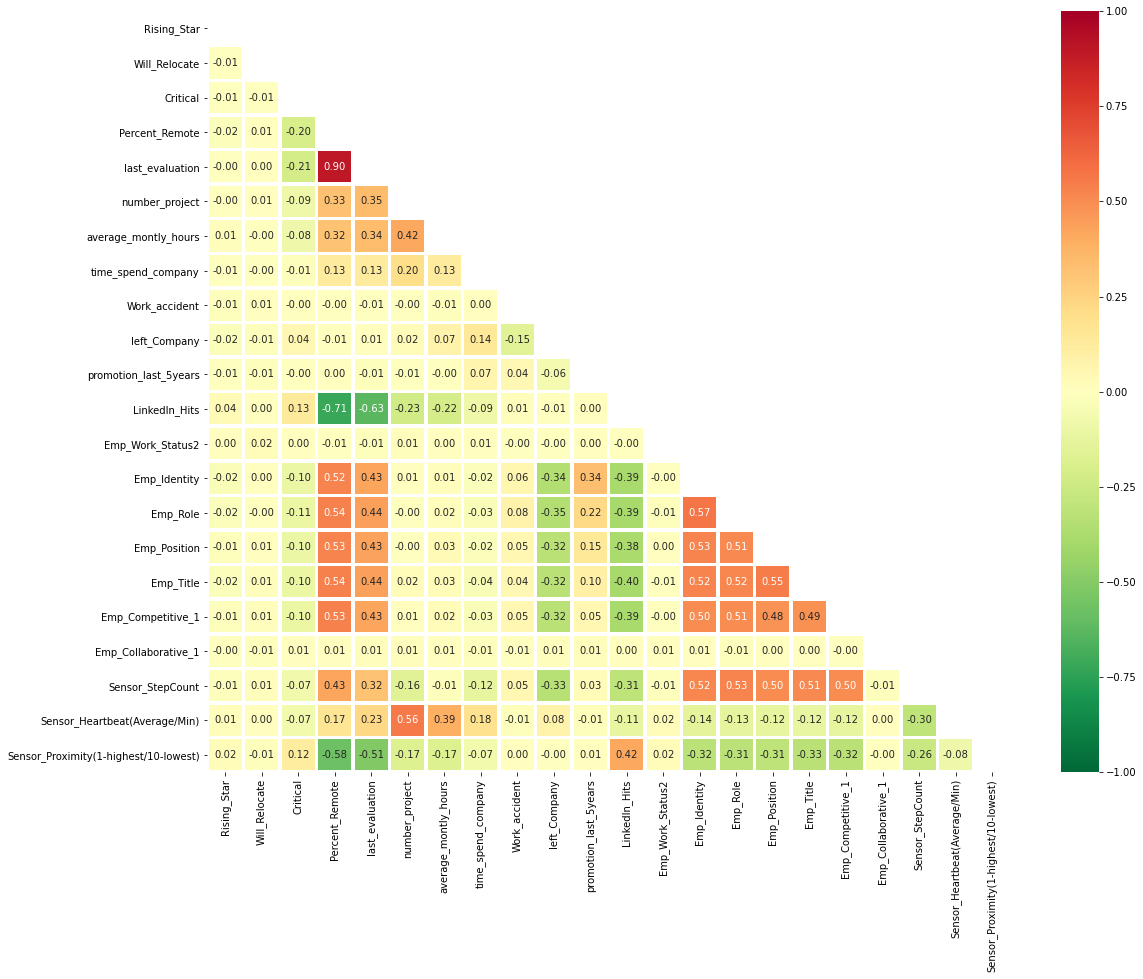

In [13]:
explorando = Analise_exploratoria()
explorando.mapa_de_correlacao(dados_pre_processados_EAD, método ='pearson', filtro_p_values = False)

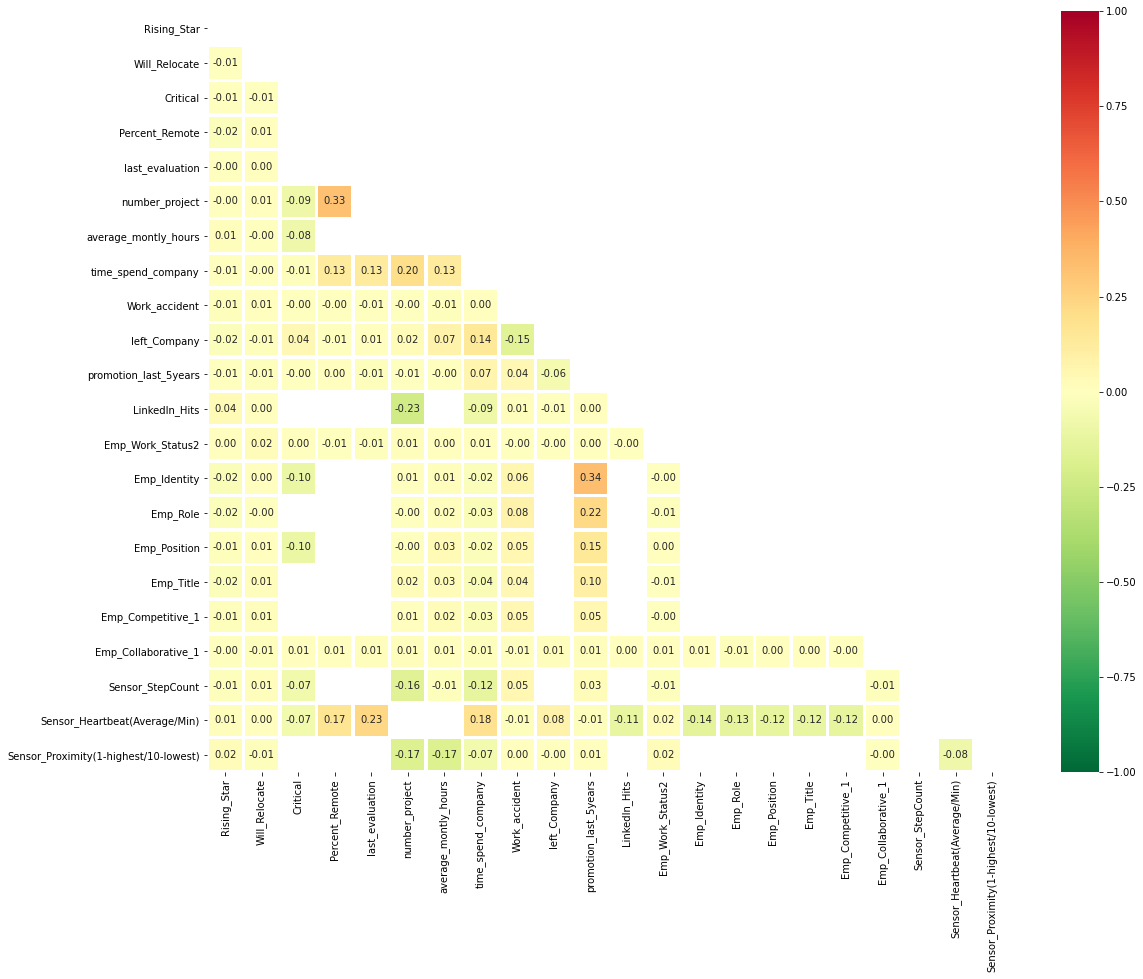

In [15]:
explorando.mapa_de_correlacao(dados_pre_processados_EAD, método ='pearson', filtro_p_values = True, p = 0.05)

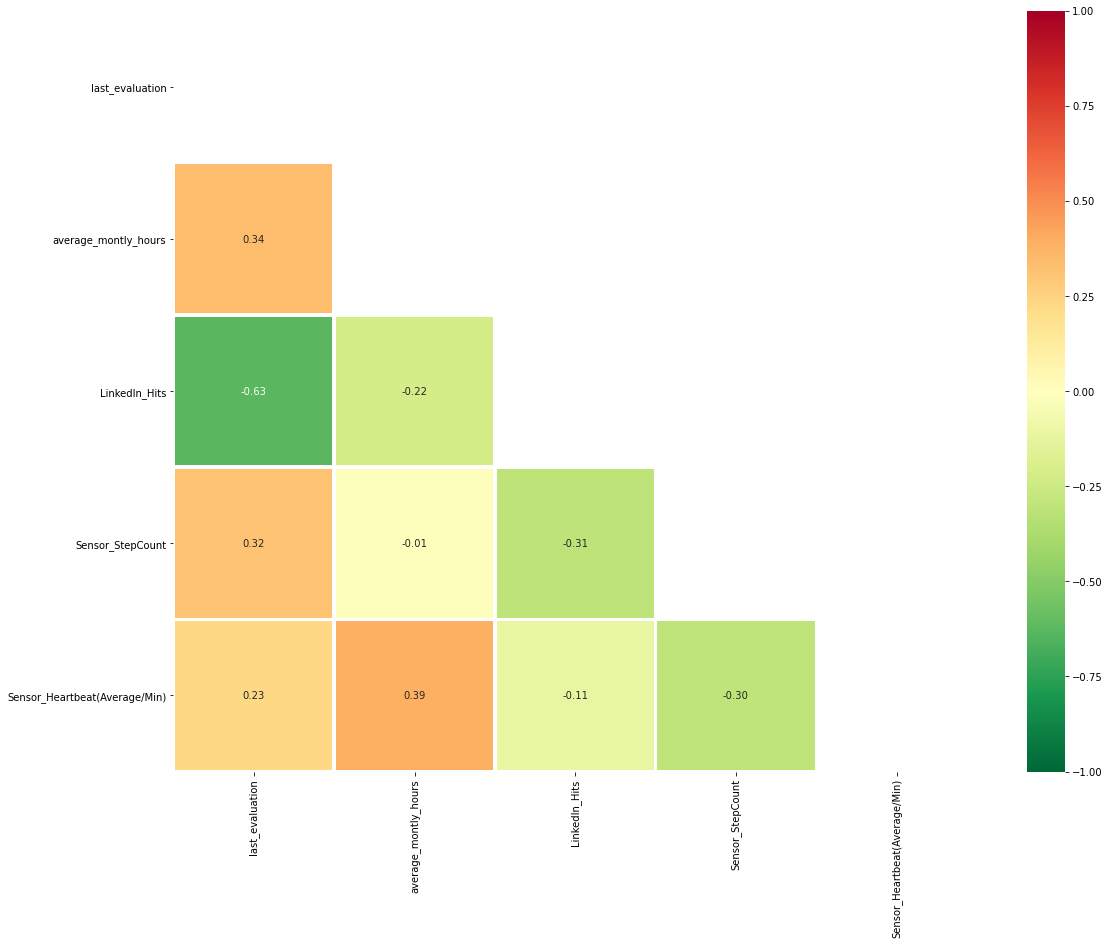

In [17]:
Features_var_cont = ["last_evaluation"
                    ,"average_montly_hours"
                    ,"LinkedIn_Hits"
                    ,"Sensor_StepCount"
                    ,"Sensor_Heartbeat(Average/Min)"]

explorando.mapa_de_correlacao(dados_pre_processados_EAD[Features_var_cont], método ='pearson',  filtro_p_values = False)

###### Observações:
* As avaliações dos funcionários estão positivamente relacionadas com, horas trabalhadas, número de passos, média de batidas do coração. E negativamente relacionado com o  número de vezes que o funcionário visita sites de rede do LinkedIn. Aparentemente funcionários que trabalham por  mais tempo, recebem maiores notas. Quem anda bastante, tende a receber maiores notas,mas não necessariamente quem anda bastante trabalha mais horas por mês.

* Aparentemente quem anda menos  faz mais  visitas em sites do linkedin, possivelmente são pessoas que trabalham em casa.
* Outra leve correlação negativa é entre batidas do coração e quantidades de passos. A minha hipótese é a seguinte: Pessoas que andam menos durante do dia tendem a ser aquelas que trabalham em casa, essas pessoas tendem a estarem sempre mais calmas. talvez o ambiente de trabalhos esteja sendo estressante 

* É muito importante observar que mesmo uma correlação forte não implica que causa e efeito

* A análise de valores duplicados, mostra que muitas colunas apresentam mais de 70% de valores duplicados.
  Logo, isso deve ser levado em consideração ao se analisar  as correlações apresentadas no gráfico

* Podemos estabelecer também associações de determinados dados com outros, como a média de horas mensais e a saída de funcionários, engajamento dos funcionários e os cargos, entre outras correlações. Logo, esses dados podem ser manipulados no mundo real de forma que possamos ajustar os valores para que se atenda  exigências.

#### 3.4 Distribuição de valores:

Distribuição dos valores das colunas


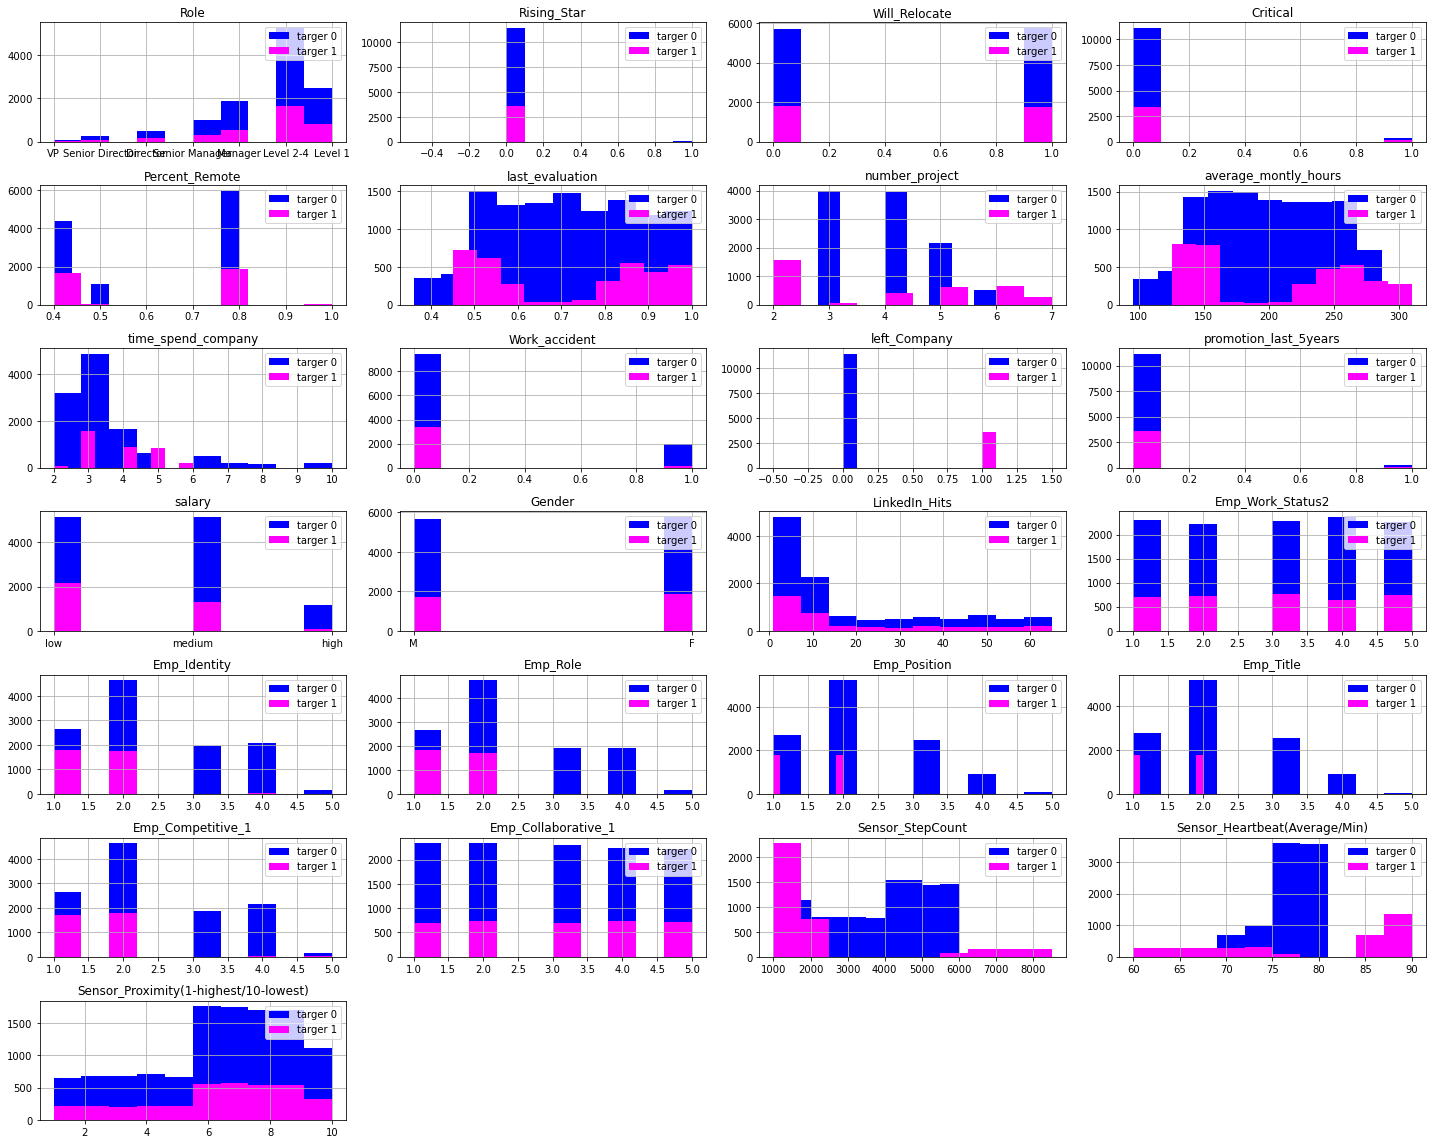

In [10]:
explorando.distribuicao_dos_valores(dados_pre_processados_EAD,  'left_Company' ) # coluna target = 'left_Company'

#### 3.5  Criando  features:
Será criado uma coluna que mede a satisfação do funcionário na empresa:
* Será uma coluna média das colunas: ['Emp_Identity', 'Emp_Role', 'Emp_Position', 'Emp_Title']

In [11]:
colunas = [ col for col in (list(dados_pre_processados_EAD.columns)[18:22])]
dados_pre_processados_EAD["satisfacao"] = dados_pre_processados_EAD[colunas].apply(np.sum, axis = 1)

#### 3.6 Gráficos  de dispersão:
* Níveis de satisfação dos funcionários 
* Média de horas mensais trabalhadas pelo funcionário. 
* Qualidade do funcionário de acordo com a empresa.

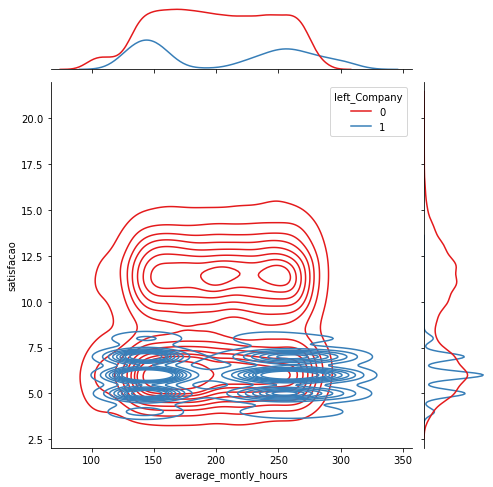

In [12]:
explorando.sns_jointplot( 'average_montly_hours',"satisfacao", dados_pre_processados_EAD, 'left_Company')

###### Observações:
* Os funcionários que deixaram a empresa estão em azul, enquanto os funcionários que permaneceram na empresa estão em vermelho.
* Esse gráfico mostra claramente que os funcionários que  não estavam satisfeitos  e que  trabalhavam  muitas horas por mês, deixaram  a empresa.

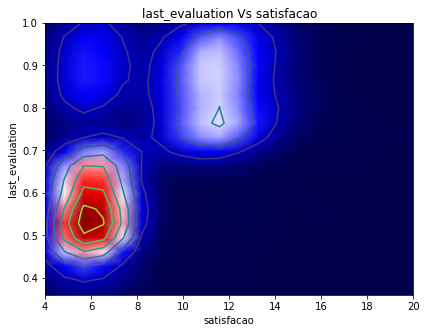

In [13]:
explorando.scatterplot_with_2d_density( dados_pre_processados_EAD, 'satisfacao', 'last_evaluation' )

* O gráfico acima claramente que mostra que funcionários que não estão satisfeitos não têm um bom desempenho em seus trabalhos na empresa.

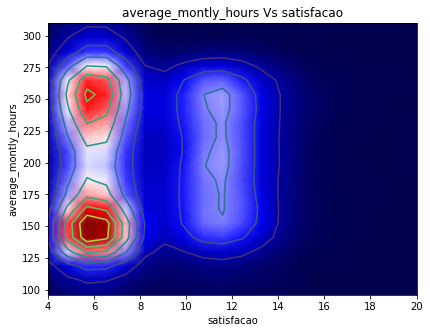

In [14]:
explorando.scatterplot_with_2d_density( dados_pre_processados_EAD, 'satisfacao', 'average_montly_hours' )

 * Analisando o  gráfico acima,  não se pode afirmar  que funcionários que trabalham muitas horas  estão menos satisfeitos que os que trabalham   poucas horas 

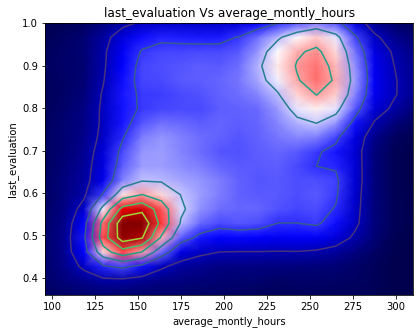

In [15]:
explorando.scatterplot_with_2d_density( dados_pre_processados_EAD,  'average_montly_hours','last_evaluation')

Com esse gráfico, pode-se sugerir 2 hipótestes:

    * A organização valoriza o tempo despendido pelo funcionário acima da qualidade do trabalho produzido, 
      isso pode ser motivo para  bons funcionários deixaram a empresa.
    * Funcionários satisfeitos trabalham mais.

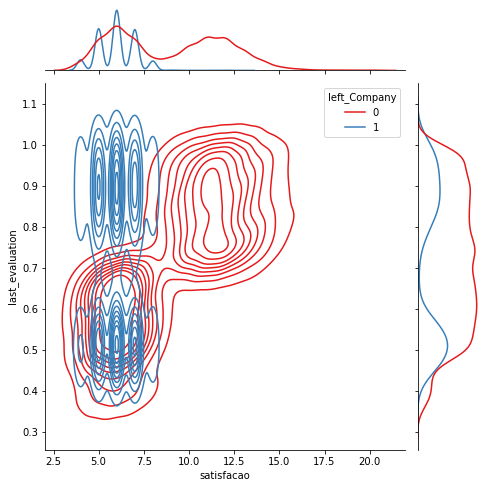

In [16]:
explorando.sns_jointplot( 'satisfacao','last_evaluation', dados_pre_processados_EAD, 'left_Company')

* Funcionários muito qualificados saem da empresa quando estão insatisfeitos.

#### 3.7 Gráficos de violino
A seguir, vamos dar uma olhada em como os funcionários atuaram na organização com base
em seus níveis salariais usando gráficos de violino.

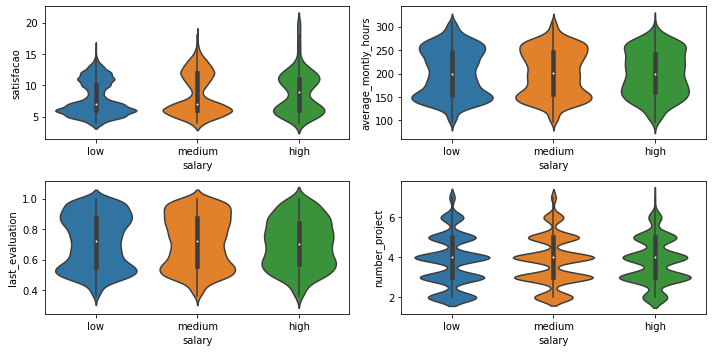

In [17]:
eixo_y = ['satisfacao','average_montly_hours','last_evaluation','number_project']
explorando.grafico_violino(dados_pre_processados_EAD, eixo_y)

Dos 4 gráficos acima, podemos observar que as distribuições para o níveis de satisfação, número de projetos, notas da última avaliação e as horas médias mensais de trabalho dos funcionários são mais ou menos iguais em todos os três níveis de salários.

#### 3.8 Histogramas - Escala logarítmica

A seguir, daremos uma olhada em alguns histogramas que nos mostram a comparação entre os funcionários que ficaram e os funcionários que saíram da empresa.Os eixos y's estão na escala logarítmica, pela natureza das análises que serão feitas.

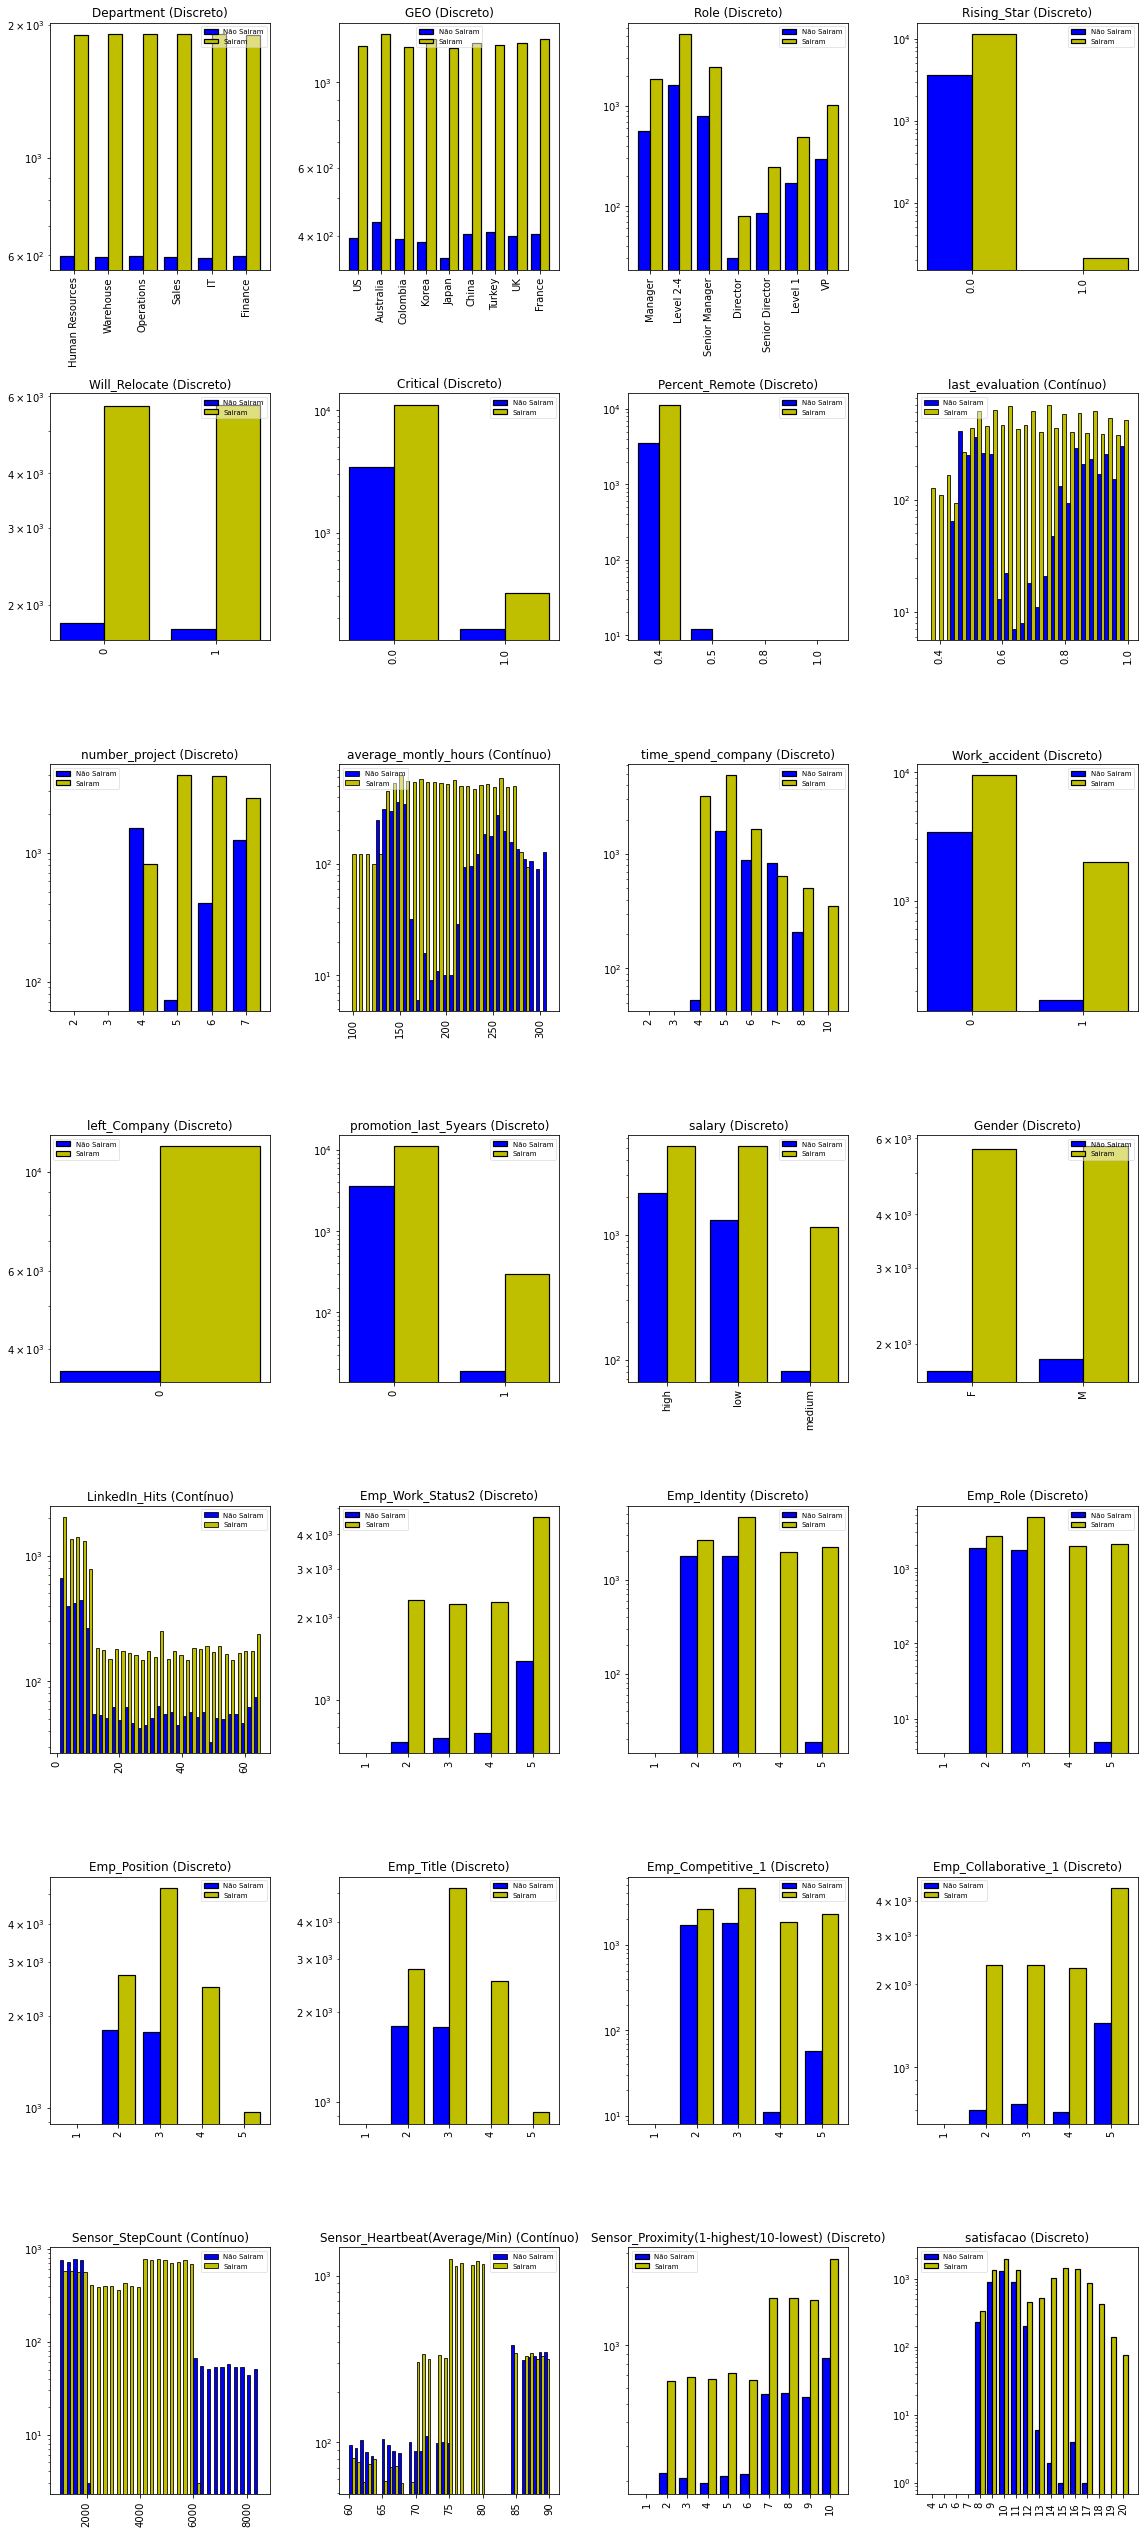

In [18]:
explorando.histograma(dados_pre_processados_EAD)

#### 3.9 Inspeção visual - histogramas: 

Histogramas com distribuições semelhantes em relação a variável 'left_Company', indicam que os fatores que têm pouca  ou nenhuma  influência sobre os funcionários saíram ou não da empresa. Está análise é inicial e visual, não pode não estar completamente certa.  

Features  com dados contínuos:
* last_evaluation
* average_montly_hours       
* LinkedIn_Hits
* Sensor_StepCount 
* Sensor_Heartbeat(Average/Min)'

#### 3.10 Criando um dicionário de features.
Agora que sabemos algumas informações sobre nossas features, é conveniente ter um dicionário  com suas características.

Obs: 
* Não estamos comparando as tendências dos histogramas de features diferentes.
* Análise por inspeção visual 
* Histogramas com eixo y na  Escala logarítmica

In [19]:
data_c = {"Semelhantes"   : list(["Department"
                                  , "GEO"
                                  , "Role" 
                                  , "Rising_Star"
                                  , "Will_Relocate"
                                  , "Critical"
                                  , "Work_accident"
                                  , "promotion_last_5years"
                                  , "Gender"
                                  , "LinkedIn_Hits"
                                  ,"Emp_Work_Status2"
                                  , "Emp_Collaborative_1"
                                  , "Sensor_Proximity(1-highest/10-lowest"
                                  , "NaN"])
                                 
                                 
        ,"Não_semelhantes": list(["Percent_Remote" 
                                 ,"last_evaluation"
                                 ,"number_project"
                                 ,"average_montly_hours"
                                 ,"time_spend_company"
                                 ,"salary"
                                 ,"Emp_Identity"
                                 ,"Emp_Role"
                                 ,"Emp_Competitive_1"
                                 ,"satisfação" 
                                 ,"Emp_Position"
                                 ," Emp_Title" 
                                 ,"Sensor_StepCount "
                                 ,"Sensor_Heartbeat(Average/Min)'"
                                ])
          }

df = pd.DataFrame(data_c)

# 4 Solução Machine Learning 

#### 4.1 Melhores funcionários de acordo com a métrica  "last_evaluation".  

* Foi aplicado o filtro  ["last_evaluation"> = 0.87] para definir os melhores  funcionários.Esse valor foi obtido apartir da análise estatística. 
* Os resultados indicam as probabilidades de saída.

In [20]:
resultado  = load('probabilidade_de_sair.joblib')
resultado.head(10)

ID
11270    0.952271
12077    0.855291
13283    0.718915
11665    0.700140
11308    0.671050
11373    0.653704
13532    0.644647
12467    0.625783
12369    0.587296
11828    0.576660
Name: probabilidade_de_sair, dtype: float64